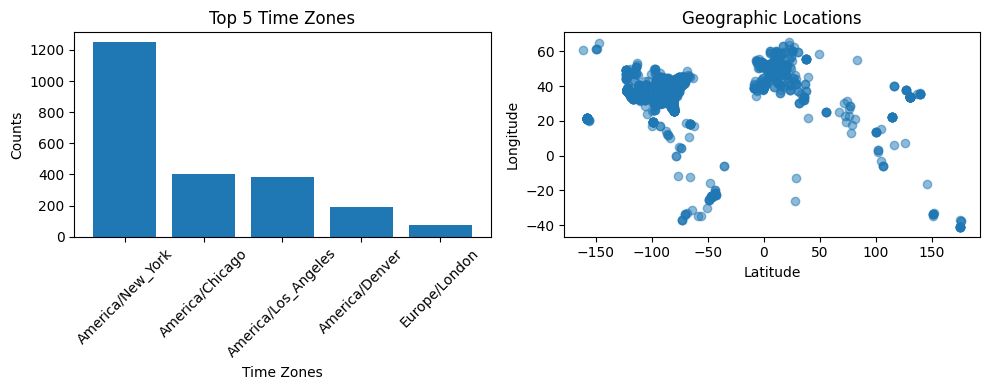

Number of times country is 'US': 2305


In [2]:
import json
import urllib.request
import matplotlib.pyplot as plt

# URL for the data file
url = "https://drive.google.com/uc?export=download&id=1xeFhy5io5D8GPlbkevpp_LgOVIttdzFs"

# Download the data file
with urllib.request.urlopen(url) as response:
    data = response.read().decode('utf-8').strip().split("\n")

# Dictionary to store the time zones and their counts
time_zone_counts = {}

# Count the number of times the country is "US"
us_count = 0

# Lists to store the scatter plot data
x = []
y = []

# Iterate over each line in the data
for line in data:
    record = json.loads(line)
    if 'tz' in record:
        time_zone = record['tz']
        if time_zone:
            time_zone_counts[time_zone] = time_zone_counts.get(time_zone, 0) + 1

            # Collect the coordinates for scatter plot
            x.append(record['ll'][1])  # latitude
            y.append(record['ll'][0])  # longitude

    if 'c' in record and record['c'] == 'US':
        us_count += 1

# Sort time zones based on their counts
sorted_time_zones = sorted(time_zone_counts.items(), key=lambda x: x[1], reverse=True)

# Extract the top 5 time zones and their counts
top_time_zones = sorted_time_zones[:5]
time_zones, counts = zip(*top_time_zones)

# Create a bar graph for the top time zones
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.bar(time_zones, counts)
plt.xlabel("Time Zones")
plt.ylabel("Counts")
plt.title("Top 5 Time Zones")
plt.xticks(rotation=45)

# Create a scatter plot for latitude and longitude
plt.subplot(1, 2, 2)
plt.scatter(x, y, marker='o', alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Geographic Locations")

plt.tight_layout()
plt.show()

# Display the count of times the country is "US"
print(f"Number of times country is 'US': {us_count}")

# code  generate a bar graph displaying the top 5 time zones and their respective counts. The plt.bar() function is creates the bar graph, and the labels and title are added using the respective functions provided by Matplotlib. Finally, plt.show() is called to display the graph.
# scatter plot is added to display the geographic locations based on latitude and longitude. The latitude values are stored in the x list, and the longitude values are stored in the y list. The scatter plot is created using the plt.scatter() function, and the marker='o' argument sets the marker shape to circles. The resulting scatter plot is shown alongside the bar graph using subplots.